# Run the test 

In [1]:
import atmPy
from atmPy.unit_testing import run_nose_tests
from atmPy.unit_testing import nose_tests
plt.style.use('hagen_default')

In [2]:
reload(run_nose_tests)
reload(nose_tests)

<module 'atmPy.unit_testing.nose_tests' from '/Users/htelg/prog/atm-py/atmPy/unit_testing/nose_tests.py'>

## all

In [3]:
run_nose_tests.run()

..../Users/htelg/prog/atm-py/atmPy/aerosols/size_distribution/sizedistribution.py:2724: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sdArray = _np.zeros((periods, numberOfDiameters - 1))
./Users/htelg/prog/atm-py/atmPy/aerosols/size_distribution/sizedistribution.py:1090: UserWarning: This function is deprecated use close_gaps instead ... unless you like thisone better
  _warnings.warn('This function is deprecated use close_gaps instead ... unless you like thisone better')
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
..
-----------------------------

## onebyone

In [5]:
reload(nose_tests)

<module 'atmPy.unit_testing.nose_tests' from '/Users/htelg/prog/atm-py/atmPy/unit_testing/nose_tests.py'>

In [1]:
from atmPy.unit_testing import run_nose_tests
from atmPy.unit_testing import nose_tests

In [3]:
test = nose_tests.SizeDistTest()
test.test_mixing_ratios()


TypeError: 'float' object cannot be interpreted as an integer

# data_archives

## ARM

In [1]:
from atmPy.data_archives import arm

In [2]:
arm.arm_products.keys()

dict_keys(['tdmasize', 'aipfitrh1ogrenC1', 'noaaaos', 'aosacsm', '1twr10xC1', 'tdmahyg', 'tdmaapssize'])

In [3]:
fname = './test_data/'

### 1twr10xC1

In [4]:
# # create the test file
out = arm.read_netCDF(fname, data_product='1twr10xC1')
out = out['1twr10xC1']
# out.relative_humidity.data.to_csv(fname+'1twr10xC1_rh.csv')
# out.temperature.data.to_csv(fname+'1twr10xC1_temp.csv')
# out.vapor_pressure.data.to_csv(fname + '1twr10xC1_p_vapor.csv')

In [73]:
reload(nose_tests)

<module 'nose_tests' from '/Users/htelg/prog/atm-py/unit_testing/nose_tests.py'>

In [63]:
nose_tests.test_1twr10xC1()

AttributeError: module 'atmPy.unit_testing.nose_tests' has no attribute 'test_1twr10xC1'

In [9]:
test_data_folder = './test_data/'

In [10]:
from atmPy.data_archives import arm

In [11]:
out = arm.read_netCDF(test_data_folder, data_product='1twr10xC1')
out = out['1twr10xC1']

In [13]:
# rh
soll = pd.read_csv(test_data_folder + '1twr10xC1_rh.csv', index_col=0,
                   dtype={'rh_25m': np.float32, 'rh_60m': np.float32}
                   )
# self.assertTrue(np.all(out.relative_humidity.data == soll))
# np.all(out.relative_humidity.data.index == soll.index)

In [19]:
out.relative_humidity.data.index == pd.to_datetime(soll.index)

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [16]:
out.relative_humidity.data.index

DatetimeIndex(['2012-01-31 23:59:00', '2012-02-01 00:00:00',
               '2012-02-01 00:01:00', '2012-02-01 00:02:00',
               '2012-02-01 00:03:00', '2012-02-01 00:04:00',
               '2012-02-01 00:05:00', '2012-02-01 00:06:00',
               '2012-02-01 00:07:00', '2012-02-01 00:08:00',
               ...
               '2012-02-03 23:49:00', '2012-02-03 23:50:00',
               '2012-02-03 23:51:00', '2012-02-03 23:52:00',
               '2012-02-03 23:53:00', '2012-02-03 23:54:00',
               '2012-02-03 23:55:00', '2012-02-03 23:56:00',
               '2012-02-03 23:57:00', '2012-02-03 23:58:00'],
              dtype='datetime64[ns]', name='Time', length=4320, freq=None)

In [72]:
soll.columns.name = out.relative_humidity.data.columns.name

In [ ]:
# temp
soll = pd.read_csv(test_data_folder + '1twr10xC1_temp.csv', index_col=0,
                   dtype={'temp_25m': np.float32, 'temp_60m': np.float32}
                   )
self.assertTrue(np.all(out.temperature.data == soll))

# vapor pressure
soll = pd.read_csv(test_data_folder + '1twr10xC1_p_vapor.csv', index_col=0,
                   dtype={'vap_pres_25m': np.float32, 'vap_pres_60m': np.float32}
                   )

self.assertTrue(np.all(out.vapor_pressure.data == soll))

# Aerosols

## sizedistribution

### concentrations

In [28]:
from atmPy.aerosols import size_distribution
%matplotlib inline

In [87]:
sd = size_distribution.sizedistribution.simulate_sizedistribution(diameter=[15, 3000], 
                                                             numberOfDiameters=50, 
                                                             centerOfAerosolMode=222, 
                                                             widthOfAerosolMode=0.18, 
                                                             numberOfParticsInMode=888)

sd.particle_number_concentration == 888.0

float(sd.particle_surface_concentration.values) == 194.42186363605904

float(sd.particle_volume_concentration.values) == 11.068545094055812

sd.properties.particle_density =2.2

float(sd.particle_mass_concentration) == 24.350799206922783

#### including mixing rations

In [1]:
from atmPy.aerosols import size_distribution
%matplotlib inline

In [5]:
sd = size_distribution.sizedistribution.simulate_sizedistribution_timeseries(diameter=[15, 3000], 
                                                                             numberOfDiameters=50, 
                                                                             centerOfAerosolMode=222, 
                                                                             widthOfAerosolMode=0.18, 
                                                                             numberOfParticsInMode=888, 
                                                                             startDate='2015-10-23 16:00:00', 
                                                                             endDate='2015-10-23 17:00:00', 
                                                                             frequency=60)

sd.data = sd.data.iloc[[0],:]
sd.housekeeping = atmPy.general.timeseries.TimeSeries(pd.DataFrame(np.array([[250.], [750.]]).transpose(), index = sd.data.index, columns=['temperature_K', 'pressure_Pa']))
sd.parameters4reductions.particle_density =2.8
float(sd.particle_mass_mixing_ratio.data.values) * 1e6 == 2.96533739732464

> /Users/htelg/prog/atm-py/atmPy/aerosols/size_distribution/sizedistribution.py(2751)simulate_sizedistribution_timeseries()
-> sdArray = _np.zeros((periods, numberOfDiameters - 1))
(Pdb) c


True

#### muell

In [1]:
from atmPy.aerosols import size_distribution
%matplotlib inline

In [2]:
sd = size_distribution.sizedistribution.simulate_sizedistribution_timeseries(diameter=[15, 3000], 
                                                                             numberOfDiameters=50, 
                                                                             centerOfAerosolMode=222, 
                                                                             widthOfAerosolMode=0.18, 
                                                                             numberOfParticsInMode=888, 
                                                                             startDate='2015-10-23 16:00:00', 
                                                                             endDate='2015-10-23 17:00:00', 
                                                                             frequency=60)

In [3]:
sd.hygroscopicity.parameters._check_growth_parameters_exist()

ValueError: One of the Parameters kappa or growth_distribution needs to be set ... do so!

In [4]:
sd.hygroscopicity.parameters.kappa = 1.5
sd.hygroscopicity.parameters._check_growth_parameters_exist()

True

In [6]:
sd.hygroscopicity.parameters.growth_distribution = 5
sd.hygroscopicity.parameters

RH                  :  None
growth_distribution :  5
kappa               :  None
particle_density    :  1.8
refractive_index    :  None

In [4]:
sd.optical_properties.parameters.wavelength = 550
sd.optical_properties.parameters.refractive_index = 1.5
sd.optical_properties.parameters._check_opt_prop_param_exist()

True

In [9]:
np.any([False,False])

False

### moment conversion

In [28]:
from atmPy.aerosols import size_distribution
%matplotlib inline

In [76]:
sd = size_distribution.sizedistribution.simulate_sizedistribution(diameter=[15, 3000], 
                                                             numberOfDiameters=50, 
                                                             centerOfAerosolMode=222, 
                                                             widthOfAerosolMode=0.18, 
                                                             numberOfParticsInMode=888)

sd_dNdDp = sd.convert2dNdDp()
sd_dNdlogDp = sd.convert2dNdlogDp()
sd_dSdDp = sd.convert2dSdDp()
sd_dSdlogDp = sd.convert2dSdlogDp()
sd_dVdDp = sd.convert2dVdDp()
sd_dVdlogDp = sd.convert2dVdlogDp()

folder = './test_data/'

# sd.save_csv(folder + 'aerosols_size_dist_moments_sd.nc')
# sd_dNdDp.save_csv(folder + 'aerosols_size_dist_moments_sd_dNdDp.nc')
# sd_dNdlogDp.save_csv(folder + 'aerosols_size_dist_moments_sd_dNdlogDp.nc')
# sd_dSdDp.save_csv(folder + 'aerosols_size_dist_moments_sd_dSdDp.nc')
# sd_dSdlogDp.save_csv(folder + 'aerosols_size_dist_moments_sd_dSdlogDp.nc')
# sd_dVdDp.save_csv(folder + 'aerosols_size_dist_moments_sd_dVdDp.nc')
# sd_dVdlogDp.save_csv(folder + 'aerosols_size_dist_moments_sd_dVdlogDp.nc')

sd_soll = size_distribution.sizedistribution.read_csv(folder + 'aerosols_size_dist_moments_sd.nc')
sd_dNdDp_soll = size_distribution.sizedistribution.read_csv(folder + 'aerosols_size_dist_moments_sd_dNdDp.nc')
sd_dNdlogDp_soll = size_distribution.sizedistribution.read_csv(folder + 'aerosols_size_dist_moments_sd_dNdlogDp.nc')
sd_dSdDp_soll = size_distribution.sizedistribution.read_csv(folder + 'aerosols_size_dist_moments_sd_dSdDp.nc')
sd_dSdlogDp_soll = size_distribution.sizedistribution.read_csv(folder + 'aerosols_size_dist_moments_sd_dSdlogDp.nc')
sd_dVdDp_soll = size_distribution.sizedistribution.read_csv(folder + 'aerosols_size_dist_moments_sd_dVdDp.nc')
sd_dVdlogDp_soll = size_distribution.sizedistribution.read_csv(folder + 'aerosols_size_dist_moments_sd_dVdlogDp.nc')

threshold = 1e-10
assert(abs((sd.data.values - sd_soll.data)).values.sum() < (sd.data.values.max() * threshold))
assert((sd_dNdDp.data - sd_dNdDp_soll.data).values.sum() < (sd_dNdDp.data.values.max() * threshold))
assert((sd_dSdDp.data - sd_dSdDp_soll.data).values.sum() < (sd_dSdDp.data.values.max() * threshold))
assert((sd_dVdDp.data - sd_dVdDp_soll.data).values.sum() < (sd_dVdDp.data.values.max() * threshold))
assert((sd_dNdlogDp.data - sd_dNdlogDp_soll.data).values.sum() < (sd_dNdlogDp.data.values.max() * threshold))
assert((sd_dSdlogDp.data - sd_dSdlogDp_soll.data).values.sum() < (sd_dSdlogDp.data.values.max() * threshold))
assert((sd_dVdlogDp.data - sd_dVdlogDp_soll.data).values.sum() < (sd_dVdlogDp.data.values.max() * threshold))

/Users/htelg/prog/atm-py/atmPy/aerosols/size_distribution/sizedistribution.py:844: UserWarning: This function is deprecated use close_gaps instead ... unless you like thisone better
  _warnings.warn('This function is deprecated use close_gaps instead ... unless you like thisone better')
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [86]:
(sd.data.values - sd_soll.data.values).sum()

-8.7785748722638802e-16

In [81]:
(abs((sd.data - sd_soll.data).dropna()).values.sum() < (sd.data.values.max() * threshold))

True

### optical properties

In [1]:
from atmPy.aerosols import size_distribution
import atmPy
from atmPy.unit_testing import nose_tests
%matplotlib inline

In [3]:
test = nose_tests.SizeDistTest()
test.test_opt_prop_LS()

calc opt_prop


In [6]:
sd = size_distribution.sizedistribution.simulate_sizedistribution_layerseries(diameter=[10, 2500], 
                                                                              numberOfDiameters=100, 
                                                                              heightlimits=[0, 6000], 
                                                                              noOflayers=100, 
                                                                              layerHeight=[500.0, 4000.0], 
                                                                              layerThickness=[100.0, 300.0], 
                                                                              layerDensity=[1000.0, 50.0], 
                                                                              layerModecenter=[200.0, 800.0], 
                                                                              widthOfAerosolMode=0.2)

sd.optical_properties.parameters.refractive_index = 1.56
sd.optical_properties.parameters.wavelength = 515

fname = './test_data/aerosols_size_dist_LS_optprop.nc'
sdl = atmPy.read_file.netCDF(fname)

np.all(sd.optical_properties.aod_cumulative.data['aod'] == sdl.data['AOD per Layer'])

calc opt_prop


False

In [8]:
(sd.optical_properties.aod_cumulative.data['aod'] - sdl.data['AOD per Layer']).sum()

1.5445301543875677e-19

In [ ]:
        if aod:
            layerThickness = sdls.layerbounderies[i][1] - sdls.layerbounderies[i][0]
            AOD_perBin = extinction_coefficient * layerThickness
            AOD_layer[i] = AOD_perBin.values.sum()

In [ ]:
        out['AOD'] = AOD_layer[~ _np.isnan(AOD_layer)].sum()
        out['AOD_layer'] = _pd.DataFrame(AOD_layer, index=sdls.layercenters, columns=['AOD per Layer'])
        out['AOD_cum'] = out['AOD_layer'].iloc[::-1].cumsum().iloc[::-1]

In [ ]:
layerThickness = sd.layerbounderies[i][1] - sd.layerbounderies[i][0]
AOD_perBin = extinction_coefficient * layerThickness
AOD_layer[i] = AOD_perBin.values.sum()

In [49]:
layerthickness = sd.layerbounderies[:,1] - sd.layerbounderies[:,0]
aod_per_bin_per_layer = sd.optical_properties.extinction_coeff_per_bin.multiply(layerthickness, axis=0)
aod_per_layer = pd.DataFrame(aod_per_bin_per_layer.sum(axis=1), columns= ['aod_per_layer'])
aod = aod_per_layer.values.sum()
aod_cumulative = aod_per_layer.iloc[::-1].cumsum()
aod_cumulative.rename(columns={'aod_per_layer': 'aod'})

,aod
5970.0,2.552018e-12
5910.0,1.185391e-11
5850.0,4.442911e-11
5790.0,1.540343e-10
5730.0,5.083605e-10
5670.0,1.608895e-09
5610.0,4.893115e-09
5550.0,1.430961e-08
5490.0,4.024986e-08
5430.0,1.089073e-07


In [6]:
sd.optical_properties._optical_porperties.keys()

dict_keys(['parent_type', 'index_of_refraction', 'absCoeff_perrow_perbin', 'scattCoeff_perrow_perbin', 'angular_scatt_func', 'wavelength', 'bins', 'bin_centers', 'extCoeff_perrow_perbin', 'asymmetry_param', 'binwidth', 'distType'])

In [35]:
fname = './test_data/aerosols_size_dist_LS_optprop.nc'
sd.optical_properties.aerosol_optical_depth_cumulative_VP.save_netCDF(fname)

### hygroscopic growth

In [5]:
sdto = nose_tests.SizeDistTest()
sdto.test_opt_prop_LS()
sdto.test_growth_opt_propLS()

> /Users/htelg/prog/atm-py/atmPy/aerosols/physics/hygroscopicity.py(696)apply_growth2sizedist()
-> return sd_grown
(Pdb) sd.distributionType
'numberConcentration'
(Pdb) sd_grown.distributionType
'numberConcentration'
(Pdb) sd.data == sd_grown.data
bincenters_(nm) 10.286785   10.876803   11.500663   12.160306   12.857784    \
30.0                  False       False       False       False       False   
90.0                  False       False       False       False       False   
150.0                 False       False       False       False       False   
210.0                 False       False       False       False       False   
270.0                 False       False       False       False       False   
330.0                 False       False       False       False       False   
390.0                 False       False       False       False       False   
450.0                 False       False       False       False       False   
510.0                 False       False  

BdbQuit: 

In [4]:
sdto.sizedistributionLS.distributionType

'dNdDp'

In [1]:
from atmPy.unit_testing import nose_tests
from atmPy.general import vertical_profile
import atmPy
%matplotlib inline
# nose_tests.size_distribution.sizedistribution.settings

In [2]:
# use the same dist_LS as in test_opt_prop_LS
sdto = nose_tests.SizeDistTest()
sdto.test_opt_prop_LS()

# generate some RH which we can put into the housekeeping
hk = pd.DataFrame(index = sdto.sizedistributionLS.data.index, columns=['Relative_humidity'])
hk['Relative_humidity'] = 90
hk = vertical_profile.VerticalProfile(hk)
sdto.sizedistributionLS.housekeeping = hk

sdto.sizedistributionLS.hygroscopicity.parameters.RH = hk

# let it grow
sdto.sizedistributionLS.hygroscopicity.parameters.kappa = 0.7

distg = sdto.sizedistributionLS.hygroscopicity.grown_size_distribution

distg.optical_properties.parameters.wavelength = sdto.sizedistributionLS.optical_properties.parameters.wavelength.value

# load the test data
fname = './test_data/aerosols_size_dist_LS_hyg_growth_optprop.nc'
aodcs = atmPy.read_file.netCDF(fname)

threshold = distg.optical_properties.aod_cumulative.data.values.sum() * 1e-5

res = np.abs(distg.optical_properties.aod_cumulative.data.values
 - aodcs.data.values).sum() < threshold
print(np.abs(distg.optical_properties.aod_cumulative.data.values
 - aodcs.data.values).sum() , threshold), res

calculating opt prop


(<matplotlib.figure.Figure at 0x107df4be0>,
 <matplotlib.colorbar.Colorbar at 0x1099f0198>)

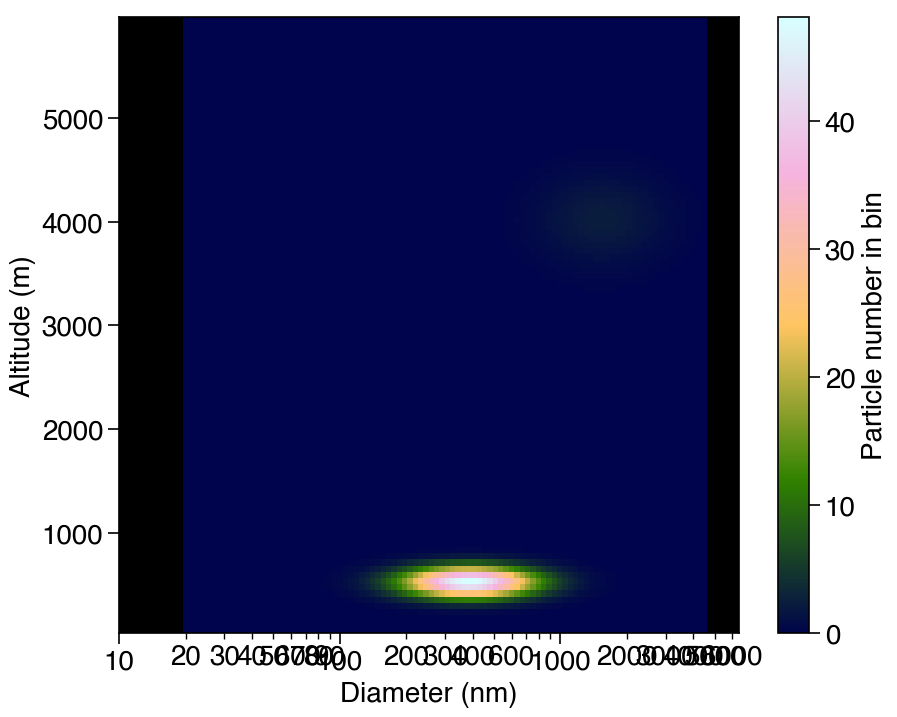

In [13]:
distg.plot()

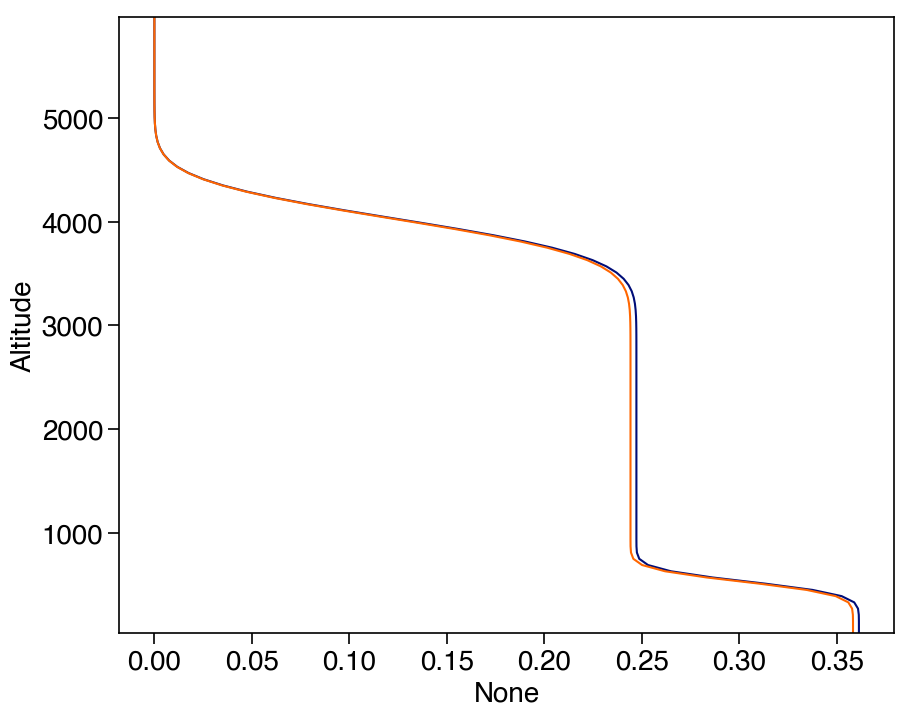

In [25]:
a = aodcs.plot()
distg.optical_properties.aod_cumulative.plot(ax = a)

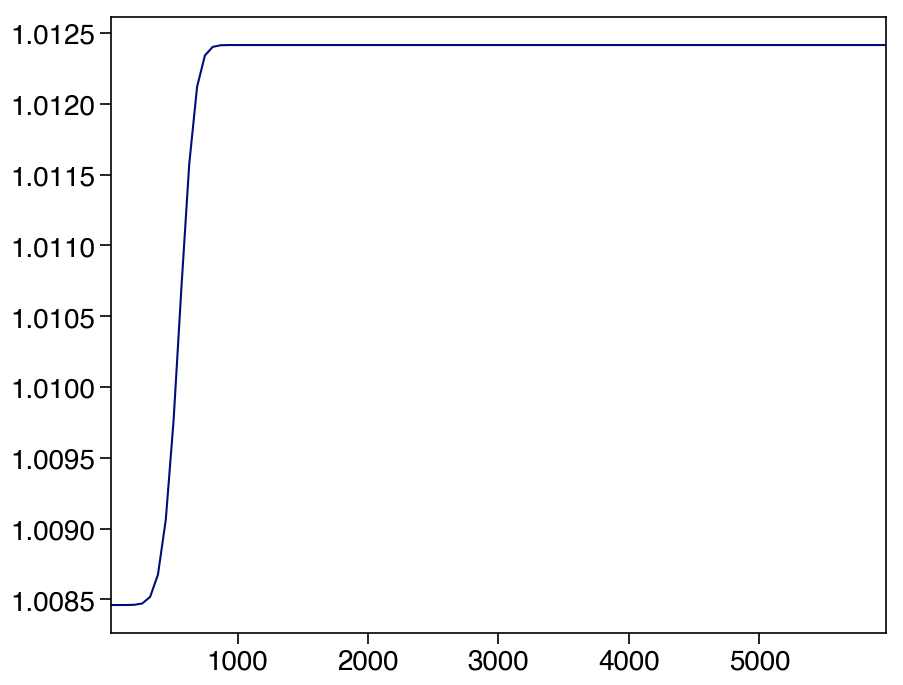

In [33]:
(aodcs.data.iloc[:,0] / distg.optical_properties.aod_cumulative.data.iloc[:,0]).plot()

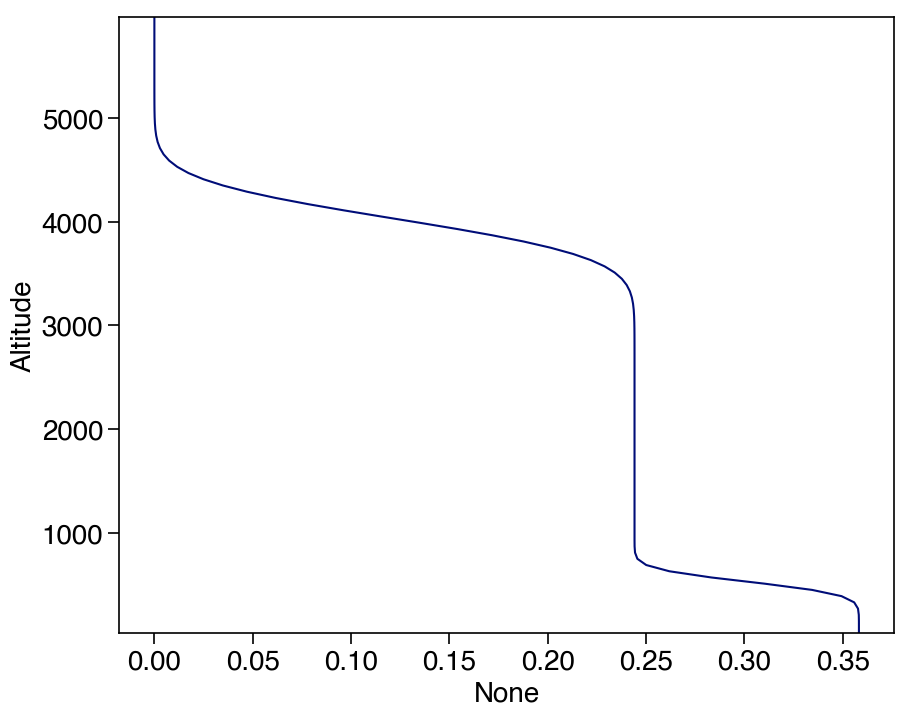

In [15]:
distg.optical_properties.aod_cumulative.plot()

In [16]:
fname = './test_data/aerosols_size_dist_LS_hyg_growth_optprop.nc'
distg.optical_properties.aod_cumulative.save_netCDF(fname)

## physics

### hygroscopicity

#### growth_factor_distribution

In [3]:
from atmPy.aerosols.physics import hygroscopicity as hyg
from atmPy.data_archives import arm
from atmPy.unit_testing import nose_tests

In [4]:
sdto = nose_tests.PhysicsHygroscopicityTest()

In [5]:
sdto.test_hygroscopic_growth_factor_distributions()

0.00013942675005562856 0.00028999998226984477 True
1.0720131907726582e-06 1.0701970171113901e-05 True
1.46980131315e-05 2.3521201654915003e-05 True


/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


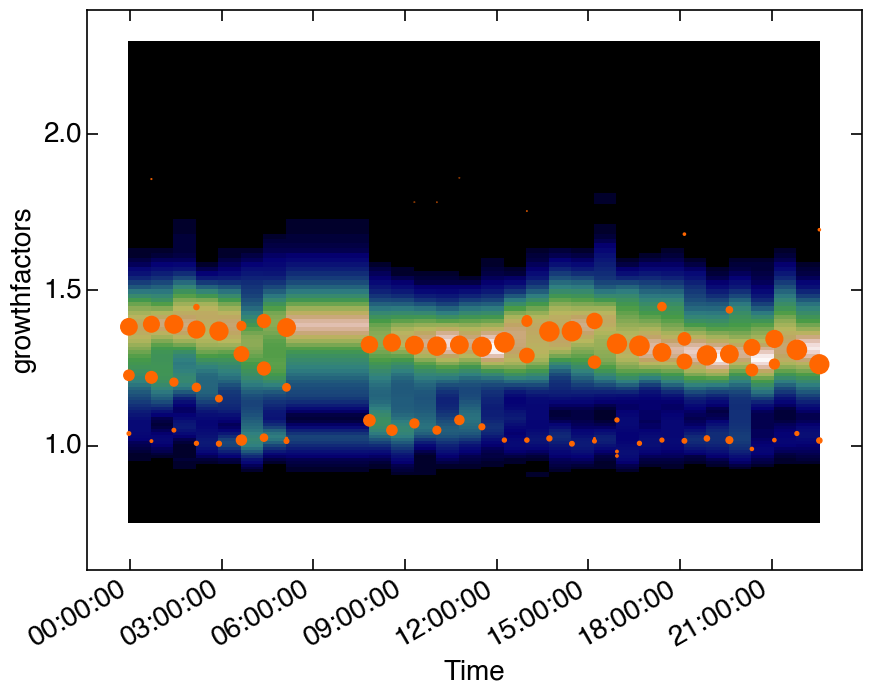

In [14]:
fname = './test_data/sgptdmahygC1.b1.20120601.004227.cdf'
out = arm.read_netCDF(fname, data_quality= 'patchy', leave_cdf_open= False)
hgfd = hyg.HygroscopicGrowthFactorDistributions(out.hyg_distributions.data.loc[:,200.0,:].transpose())
hgfd.plot()

fname = './test_data/aerosols_physics_hygroscopicity_growth_mode.csv'
growth_mode_soll = pd.read_csv(fname, index_col=0)

threshold = growth_mode_soll.ratio.sum() * 1e-5
res = np.abs(hgfd.growth_modes_gf.ratio - growth_mode_soll.ratio).sum() < threshold
print(np.abs(hgfd.growth_modes_gf.ratio - growth_mode_soll.ratio).sum(), threshold, res)

threshold = growth_mode_soll.gf.sum() * 1e-7
res = np.abs(hgfd.growth_modes_gf.gf - growth_mode_soll.gf).sum()< threshold
print(np.abs(hgfd.growth_modes_gf.gf - growth_mode_soll.gf).sum(), threshold, res)

#######
fname = './test_data/aerosols_physics_hygroscopicity_mixing_state.csv'
mixing_state_soll = pd.read_csv(fname, index_col=0)

threshold = mixing_state_soll.mixing_state.sum() * 1e-6
res = np.abs(hgfd.mixing_state.mixing_state - mixing_state_soll.mixing_state).sum() < threshold
print(np.abs(hgfd.mixing_state.mixing_state - mixing_state_soll.mixing_state).sum(), threshold, res)

In [183]:
fname = './test_data/aerosols_physics_hygroscopicity_growth_mode.csv'
hgfd.growth_modes.to_csv(fname)

In [184]:
fname = './test_data/aerosols_physics_hygroscopicity_mixing_state.csv'
hgfd.mixing_state.to_csv(fname)

### f of RH

#### kappa

In [4]:
from atmPy.data_archives import arm
%matplotlib inline
plt.style.use('hagen_default')

In [5]:
fname = 'test_data/sgptdmaapssizeC1.c1.20120601.004227.cdf'
tdmaaps = arm.read_netCDF(fname, data_quality= 'patchy', leave_cdf_open= False)
sd = tdmaaps.size_distribution

fname = 'test_data/sgpaosacsmC1.b1.20120601.002649.cdf'
acsm = arm.read_netCDF(fname, data_quality= 'patchy', leave_cdf_open= False)

sd.parameters4reductions.refractive_index = acsm.refractive_index

sd.hygroscopicity.parameters.kappa = 0.6
sd.optical_properties.parameters.wavelength = 550
sd.optical_properties.parameters.refractive_index = 1.5

fname = './test_data/aerosols_physics_hygroscopicity_fRH_kappa.csv'
fRHk_soll = atmPy.read_file.netCDF(fname)

threshold = sd.hygroscopicity.f_RH_85_40.data.sum().values[0] * 1e-10
np.abs(sd.hygroscopicity.f_RH_85_40.data - fRHk_soll.data).sum().values[0] < threshold

/Users/htelg/prog/atm-py/atmPy/aerosols/instruments/AMS/AMS.py:63: UserWarning: Sulfate rich is not implemented yet. Mostly because I don't get it!
         There are not supposed to be any Nitrates or Chlorides present when we are in the sulfate rich regime ... but there are.
         I guess it has to do with the organics? Talk to chuck
  _warnings.warn(txt)


/Users/htelg/prog/atm-py/atmPy/aerosols/physics/optical_properties.py:112: RuntimeWarning: invalid value encountered in true_divide
  y_phase_func = y_1p * 4 * _np.pi / scattering_cross_eff.sum()


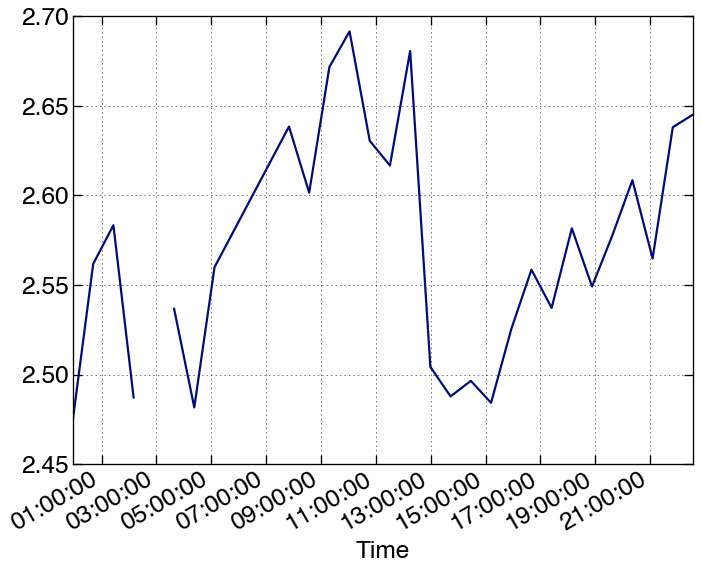

In [6]:
ax = sd.hygroscopicity.f_RH_85_40.plot()

In [7]:
fname = './test_data/aerosols_physics_hygroscopicity_fRH_kappa.csv'
sd.hygroscopicity.f_RH_85_40.save_netCDF(fname)


#### growth distribution

In [1]:
from atmPy.data_archives import arm
import atmPy
%matplotlib inline
plt.style.use('hagen_default')

In [2]:
fname = 'test_data/sgptdmaapssizeC1.c1.20120601.004227.cdf'
tdmaaps = arm.read_netCDF(fname, data_quality= 'patchy', leave_cdf_open= False)
sd = tdmaaps.size_distribution

fname = 'test_data/sgpaosacsmC1.b1.20120601.002649.cdf'
acsm = arm.read_netCDF(fname, data_quality= 'patchy', leave_cdf_open= False)

sd.parameters4reductions.refractive_index = acsm.refractive_index

fname = 'test_data/sgptdmahygC1.b1.20120601.004227.cdf'
out = arm.read_netCDF(fname, data_quality= 'patchy', leave_cdf_open= False)
hgfd = out.hyg_distributions_d200nm
sd.hygroscopicity.parameters.growth_distribution = hgfd
sd.optical_properties.parameters.wavelength = 550

# sd.hygroscopicity.parameters.RH = 85

fname = './test_data/aerosol_fRH_from_size_dist_and_growthdistribution.cdf'
fRH_gd_soll  = atmPy.read_file.netCDF(fname)

threshold = sd.hygroscopicity.f_RH_85_40.data.sum().values[0] * 1e-5
np.abs(sd.hygroscopicity.f_RH_85_40.data - fRH_gd_soll.data).sum().values[0] < threshold

/Users/htelg/prog/atm-py/atmPy/aerosols/instruments/AMS/AMS.py:63: UserWarning: Sulfate rich is not implemented yet. Mostly because I don't get it!
         There are not supposed to be any Nitrates or Chlorides present when we are in the sulfate rich regime ... but there are.
         I guess it has to do with the organics? Talk to chuck
  _warnings.warn(txt)


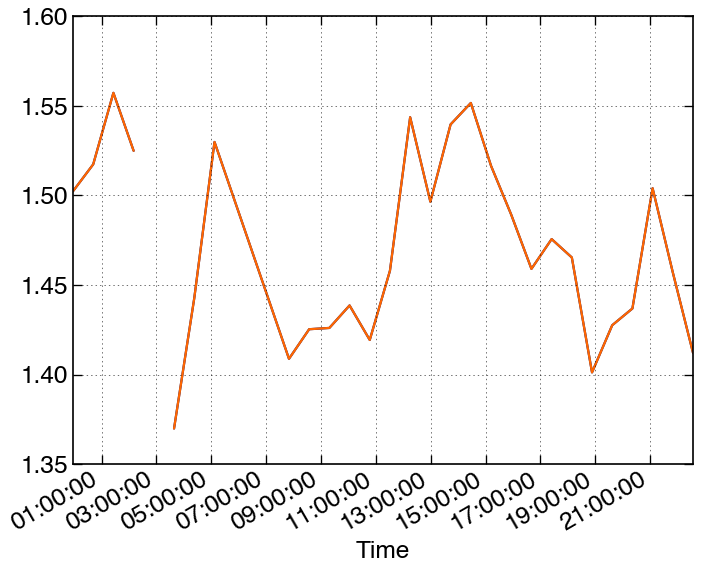

In [7]:
a = sd.hygroscopicity.f_RH_85_40.plot()
fRH_gd_soll.plot(ax = a)

/Users/htelg/prog/atm-py/atmPy/aerosols/physics/optical_properties.py:112: RuntimeWarning: invalid value encountered in true_divide
  y_phase_func = y_1p * 4 * _np.pi / scattering_cross_eff.sum()


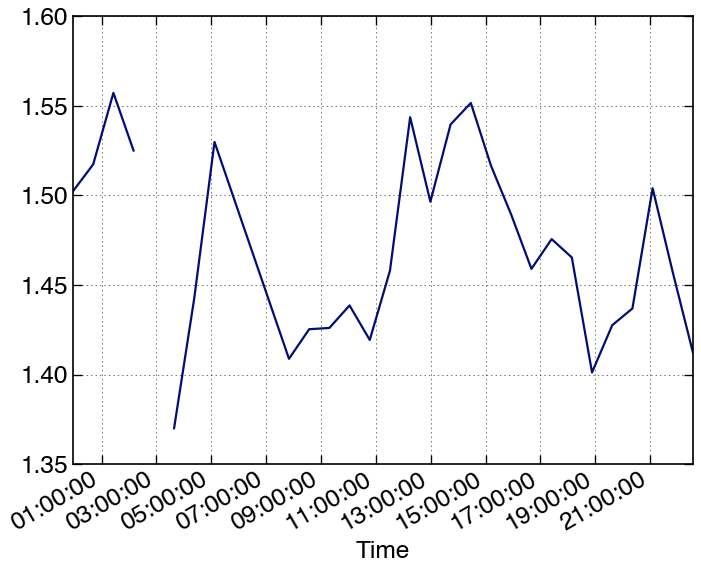

In [5]:
sd.hygroscopicity.f_RH_85_40.plot()

In [10]:
fname = './test_data/aerosol_fRH_from_size_dist_and_growthdistribution.cdf'
sd.hygroscopicity.f_RH_85_40.save_netCDF(fname)